# **Name: Omar Nezar**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Necessary Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

### Reading data from CSV file

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/first inten project.csv")

### Checking if data has been imported successfuly or not


In [ ]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


### Checking for Null Values

In [ ]:
df.isnull().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


### Checking for white spaces in the dataframe entries

In [ ]:
df.applymap(lambda x: x == ' ' if isinstance(x, str) else False).sum()

<ipython-input-36-0f5eb4365963>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: x == ' ' if isinstance(x, str) else False).sum()


,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


### Check for duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [ ]:
Data_Headings = list(df.columns)
Data_Headings

['Booking_ID',
 'number of adults',
 'number of children',
 'number of weekend nights',
 'number of week nights',
 'type of meal',
 'car parking space',
 'room type',
 'lead time',
 'market segment type',
 'repeated',
 'P-C',
 'P-not-C',
 'average price ',
 'special requests',
 'date of reservation',
 'booking status']

In [ ]:
for col in Data_Headings:
    print(f'{col}: {df[col].unique()}')

Booking_ID: ['INN00001' 'INN00002' 'INN00003' ... 'INN36284' 'INN36285' 'INN36286']
number of adults: [1 2 3 0 4]
number of children: [ 1  0  2  3 10  9]
number of weekend nights: [2 1 0 4 3 6 5 7]
number of week nights: [ 5  3  2  4  0  1 10  6 11  7 15  9 13  8 14 12 17 16]
type of meal: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
car parking space: [0 1]
room type: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
lead time: [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 160 104  22 292 109 126 303  81  54  15 161 147  87 127 418

In [ ]:
Numerical_Headings = df.select_dtypes(include=np.number).columns
Numerical_Headings

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price ', 'special requests'],
      dtype='object')

### Box Plot

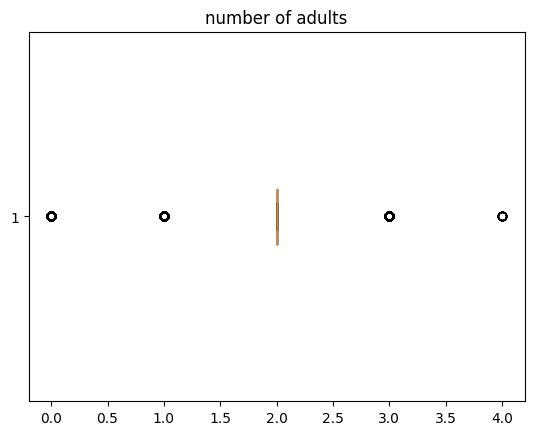

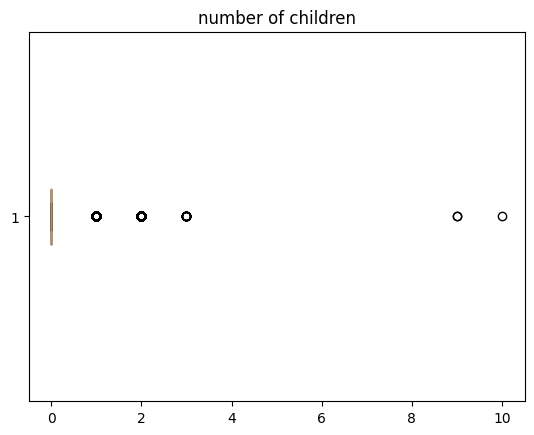

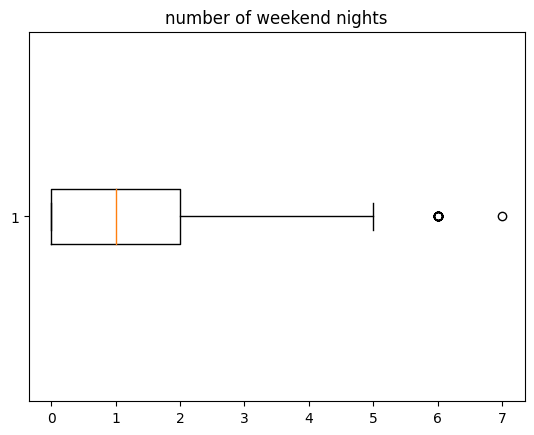

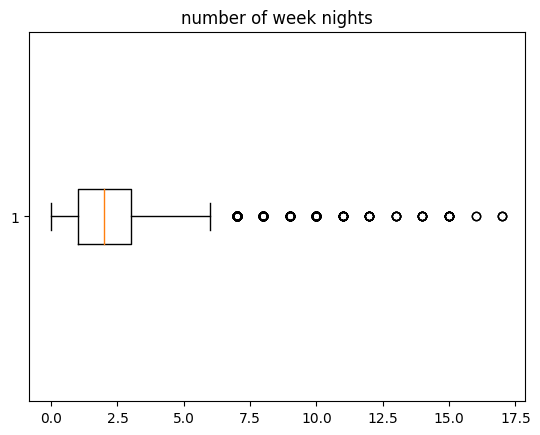

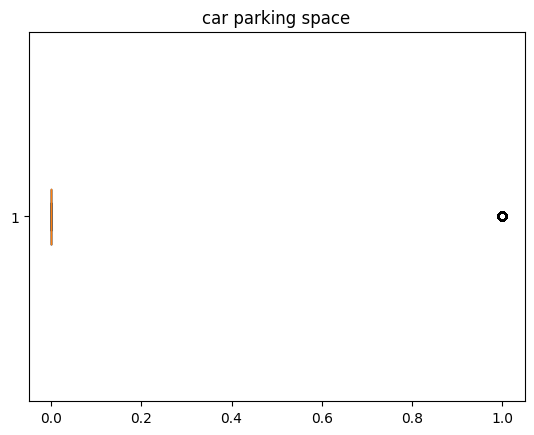

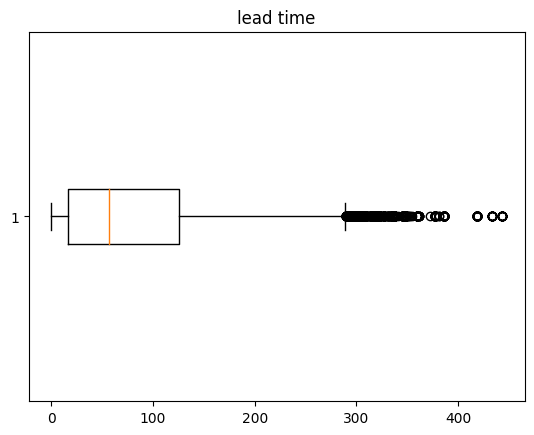

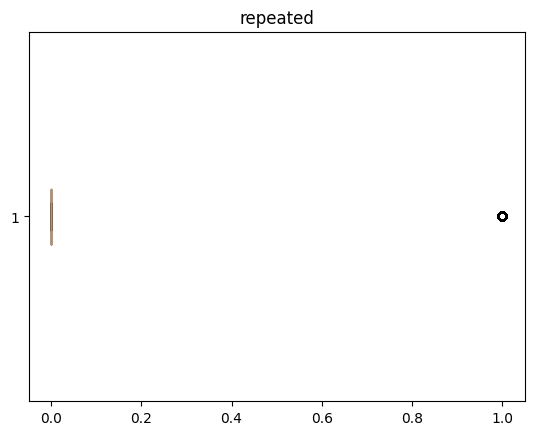

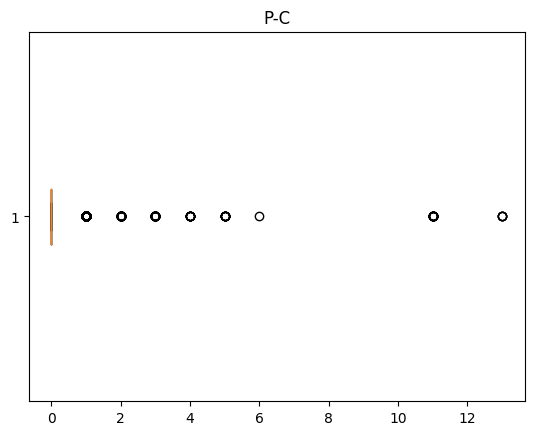

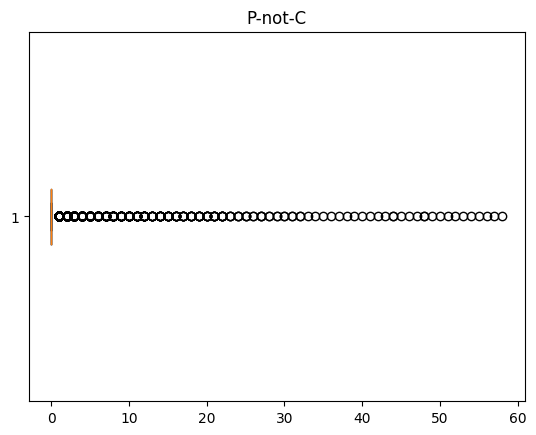

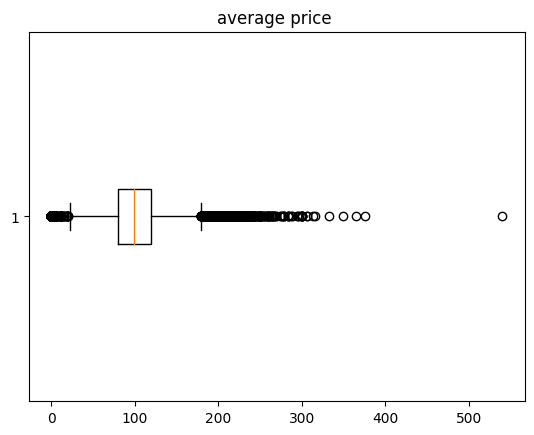

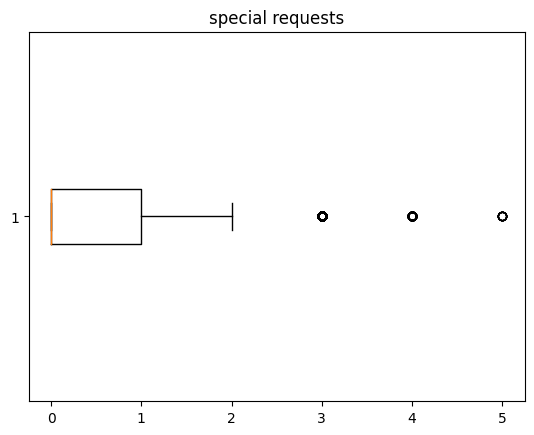

In [ ]:
for col in Numerical_Headings:
  plt.boxplot(df[col], vert=False)
  plt.title(col)
  plt.show()

### Eliminating the outliers

In [ ]:
for col in Numerical_Headings:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

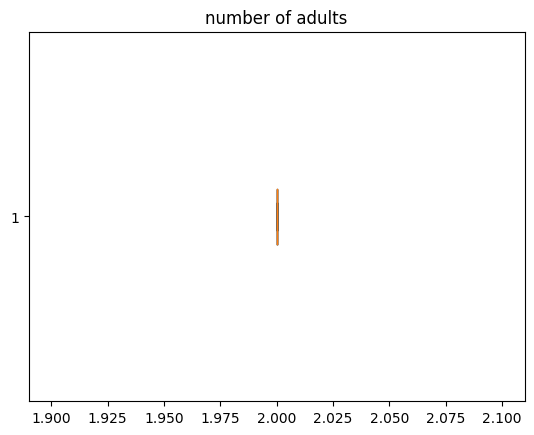

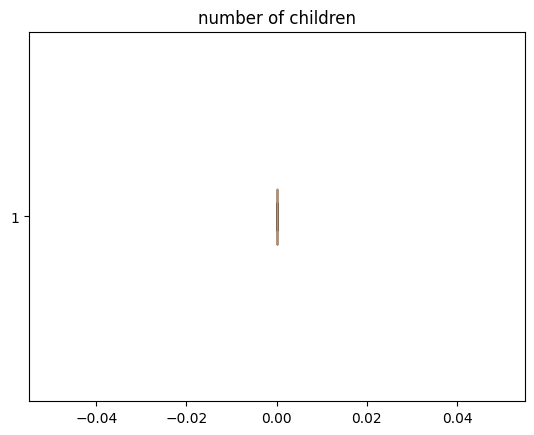

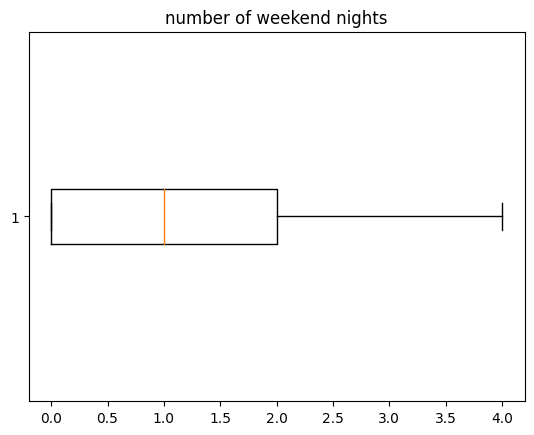

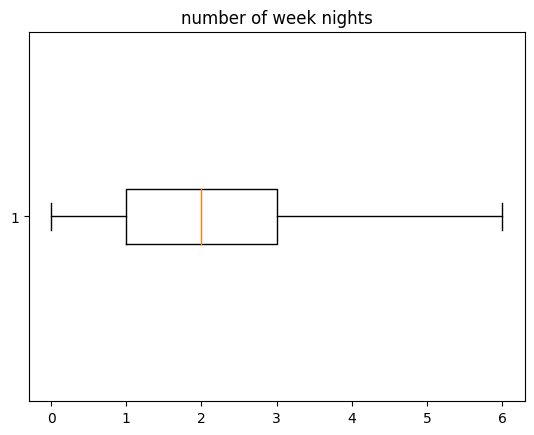

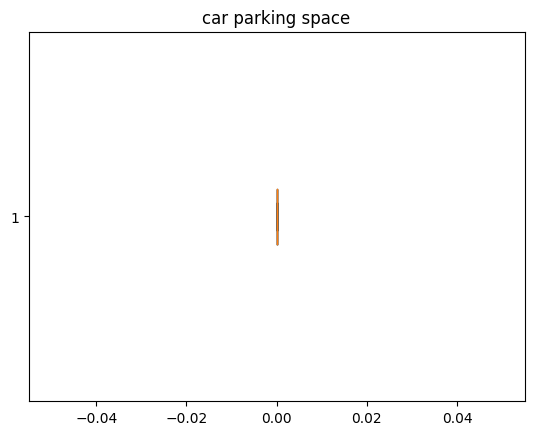

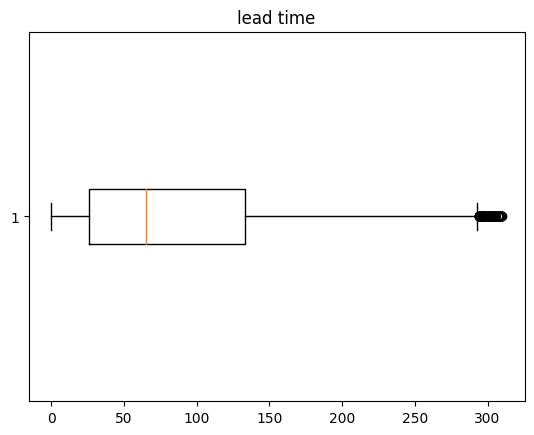

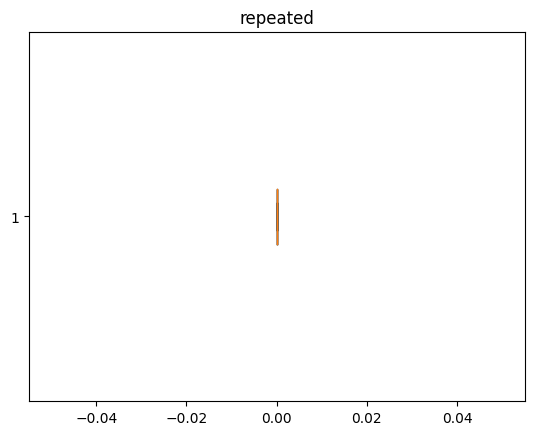

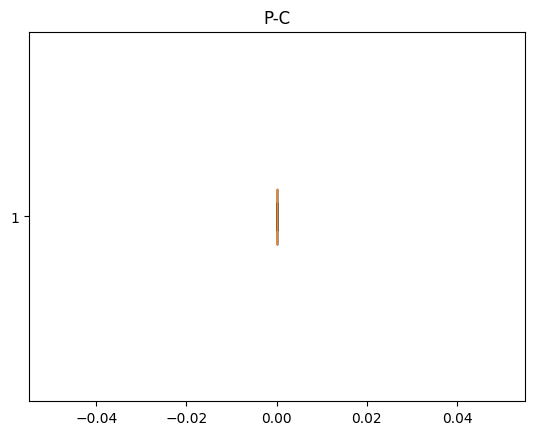

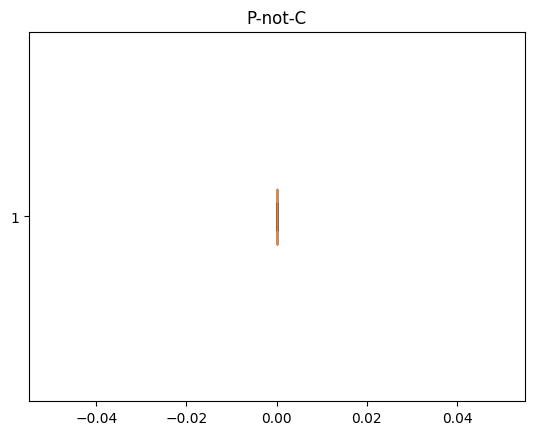

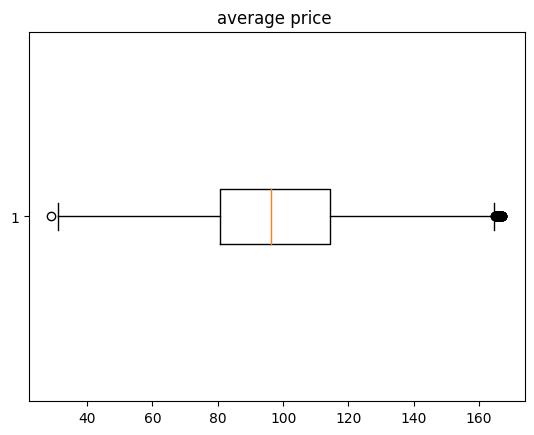

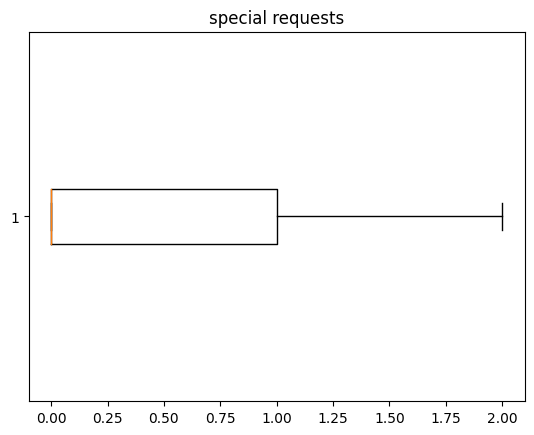

In [ ]:
for col in Numerical_Headings:
  plt.boxplot(df[col], vert=False)
  plt.title(col)
  plt.show()

### Converting Values Stings into Binary Values
Not_Canceled -> 1

Canceled -> 0

In [ ]:
df['booking status'] = df['booking status'].replace("Not_Canceled",1)
df['booking status'] = df['booking status'].replace("Canceled",0)

In [ ]:
df['Total Guests'] = df['number of adults'] + df['number of children']

In [ ]:
df = df.drop(['number of adults','number of children'], axis=1)
df = df.drop(['Booking_ID'], axis=1)
df = df.drop(['date of reservation'], axis=1)

In [ ]:
df.head()

,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,Total Guests
12,2,1,Not Selected,0,Room_Type 1,30,Online,0,0,0,88.0,0,0,2
14,0,2,Meal Plan 1,0,Room_Type 1,47,Online,0,0,0,94.5,2,1,2
15,0,2,Meal Plan 2,0,Room_Type 1,256,Online,0,0,0,115.0,1,0,2
17,1,3,Not Selected,0,Room_Type 1,1,Online,0,0,0,96.0,1,1,2
18,2,2,Meal Plan 1,0,Room_Type 1,99,Online,0,0,0,65.0,0,0,2


In [ ]:
df = pd.get_dummies(df, columns=['market segment type'], dtype=int)
df = pd.get_dummies(df, columns=['type of meal'], dtype=int)
df = pd.get_dummies(df, columns=['room type'], dtype=int)

In [ ]:
df.head()

,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,...,type of meal_Meal Plan 1,type of meal_Meal Plan 2,type of meal_Not Selected,room type_Room_Type 1,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7
12,2,1,0,30,0,0,0,88.0,0,0,...,0,0,1,1,0,0,0,0,0,0
14,0,2,0,47,0,0,0,94.5,2,1,...,1,0,0,1,0,0,0,0,0,0
15,0,2,0,256,0,0,0,115.0,1,0,...,0,1,0,1,0,0,0,0,0,0
17,1,3,0,1,0,0,0,96.0,1,1,...,0,0,1,1,0,0,0,0,0,0
18,2,2,0,99,0,0,0,65.0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21189 entries, 12 to 36282
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number of weekend nights           21189 non-null  int64  
 1   number of week nights              21189 non-null  int64  
 2   car parking space                  21189 non-null  int64  
 3   lead time                          21189 non-null  int64  
 4   repeated                           21189 non-null  int64  
 5   P-C                                21189 non-null  int64  
 6   P-not-C                            21189 non-null  int64  
 7   average price                      21189 non-null  float64
 8   special requests                   21189 non-null  int64  
 9   booking status                     21189 non-null  int64  
 10  Total Guests                       21189 non-null  int64  
 11  market segment type_Aviation       21189 non-null  int64  

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('booking status', axis=1), df['booking status'], test_size=0.2, random_state=42)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_train = KNN.predict(x_train)
print(f"accuracy_score = {round(accuracy_score(y_train, y_pred_train)*100, 0)}%")

accuracy_score = 86.0%


In [ ]:
y_pred = KNN.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"accuracy_score = {round(accuracy_score(y_test, y_pred)*100, 0)}%")

              precision    recall  f1-score   support

           0       0.74      0.65      0.70      1490
           1       0.82      0.88      0.85      2748

    accuracy                           0.80      4238
   macro avg       0.78      0.77      0.77      4238
weighted avg       0.80      0.80      0.80      4238

[[ 973  517]
 [ 336 2412]]
accuracy_score = 80.0%


In [ ]:
from sklearn.svm import SVC
SVM_Classifier = SVC(kernel='linear')
SVM_Classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_svm = SVM_Classifier.predict(x_test)
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(f"accuracy_score = {round(accuracy_score(y_test, y_pred_svm)*100, 0)}%")


              precision    recall  f1-score   support

           0       0.77      0.63      0.69      1490
           1       0.82      0.90      0.86      2748

    accuracy                           0.80      4238
   macro avg       0.79      0.76      0.77      4238
weighted avg       0.80      0.80      0.80      4238

[[ 936  554]
 [ 277 2471]]
accuracy_score = 80.0%
